In [9]:
from pathlib import Path

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 100)

In [10]:
DATA_PATH = Path.cwd().parent / "data" / "final" / "public"

In [39]:
DATA_PATH = Path(r"C:\CSC240 Final Project\Final Project")

features_df = pd.read_csv(
    DATA_PATH / "training_set_features.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    DATA_PATH / "training_set_labels.csv", 
    index_col="respondent_id"
)

#Test_set cleaning step
DATA_PATH = Path(r"C:\CSC240 Final Project\Final Project")
Test_df = pd.read_csv(
    DATA_PATH / "test_set_features.csv"
)

In [40]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [41]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [42]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [43]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
nltk.download('omw-1.4')

import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oyl06\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oyl06\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oyl06\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oyl06\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [51]:
features_df.isnull().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
health_insurance                  0
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_h1n1_sick_from_vacc       0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

In [64]:
merged_df = pd.merge(features_df, labels_df, left_index=True, right_index=True)
merged_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,-1,-1,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,-1.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,-1,-1,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# Data Composition

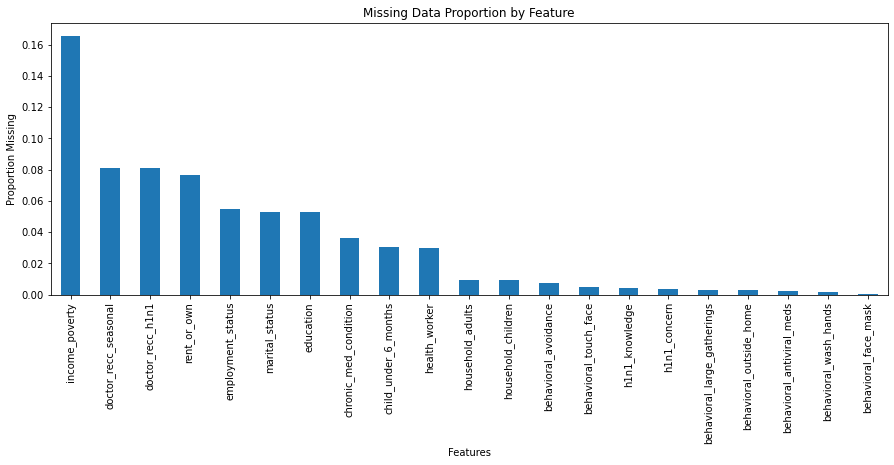

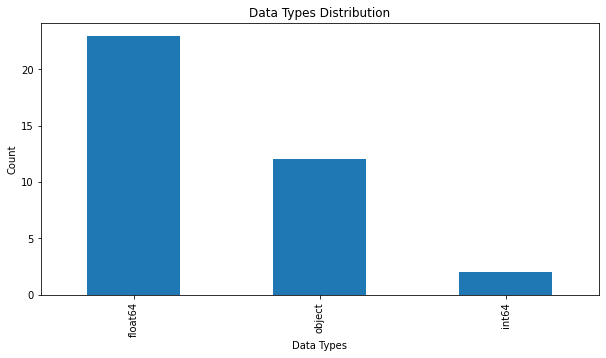

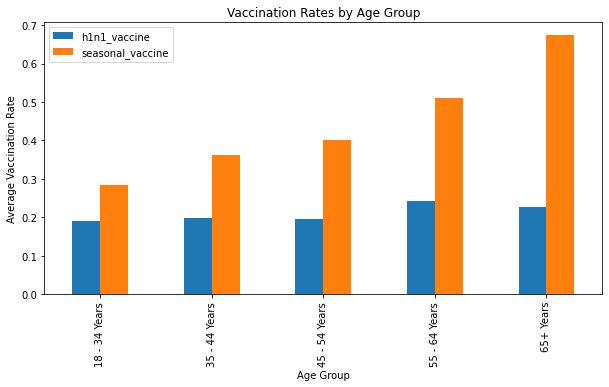

NameError: name 'corr' is not defined

<Figure size 720x576 with 0 Axes>

In [76]:
# Plot 1: Missing data by feature
plt.figure(figsize=(15, 5))
missing = merged_df.isnull().mean().sort_values(ascending=False)
missing[missing > 0].plot(kind='bar')
plt.title('Missing Data Proportion by Feature')
plt.ylabel('Proportion Missing')
plt.xlabel('Features')
plt.show()

# Plot 2: Data types distribution
plt.figure(figsize=(10, 5))
merged_df.dtypes.value_counts().plot(kind='bar')
plt.title('Data Types Distribution')
plt.ylabel('Count')
plt.xlabel('Data Types')
plt.show()

# Plot 3: Vaccination rates by Age Group
age_vaccination_rates = merged_df.groupby('age_group')[['h1n1_vaccine', 'seasonal_vaccine']].mean()
age_vaccination_rates.plot(kind='bar', figsize=(10, 5))
plt.title('Vaccination Rates by Age Group')
plt.ylabel('Average Vaccination Rate')
plt.xlabel('Age Group')
plt.show()

# Plot 4: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Exploration and Analysis

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

#1. Percentage of H1N1 and seasonal influenza vaccines vaccinated

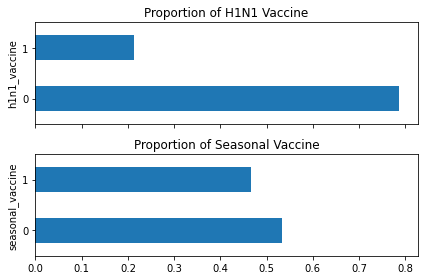

In [78]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [79]:
import pandas as pd
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(labels_df['h1n1_vaccine'], labels_df['seasonal_vaccine'])

chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi2 Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

Chi2 Statistic: 3796.8641900765715
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies: [[11239.86130977  9793.13869023]
 [ 3032.13869023  2641.86130977]]


The chi-square test results showed an extremely high Chi2 statistic (Chi2 Statistic: 3796.86) and a P-value of 0.0, which means that we can reject the null hypothesis with a very high level of confidence, namely that the h1n1_vaccine and seasonal_vaccine variables are independent of each other. In other words, there is a very significant association between these two variables.

In [80]:
#Build a logoc regression model
X = sm.add_constant(labels_df['h1n1_vaccine'])
y = labels_df['seasonal_vaccine']

logit_model = sm.Logit(y, X)

result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.615658
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       seasonal_vaccine   No. Observations:                26707
Model:                          Logit   Df Residuals:                    26705
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Mar 2024   Pseudo R-squ.:                  0.1087
Time:                        00:56:51   Log-Likelihood:                -16442.
converged:                       True   LL-Null:                       -18449.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5412      0.014    -37.853      0.000      -0.569      -0.513
h1n1_vaccine     2.1114

We also used logistic regression for testing, and the results supported the findings of the chi-square test, indicating a significant association between getting the H1N1 vaccine and the seasonal flu vaccine.

## Features

From the problem description page, we know that the feature variables are almost always categorical: a mix of binary, ordinal, and nominal features. Let's take a look at our features and pick a few features to see the correlation between and vaccination rates.

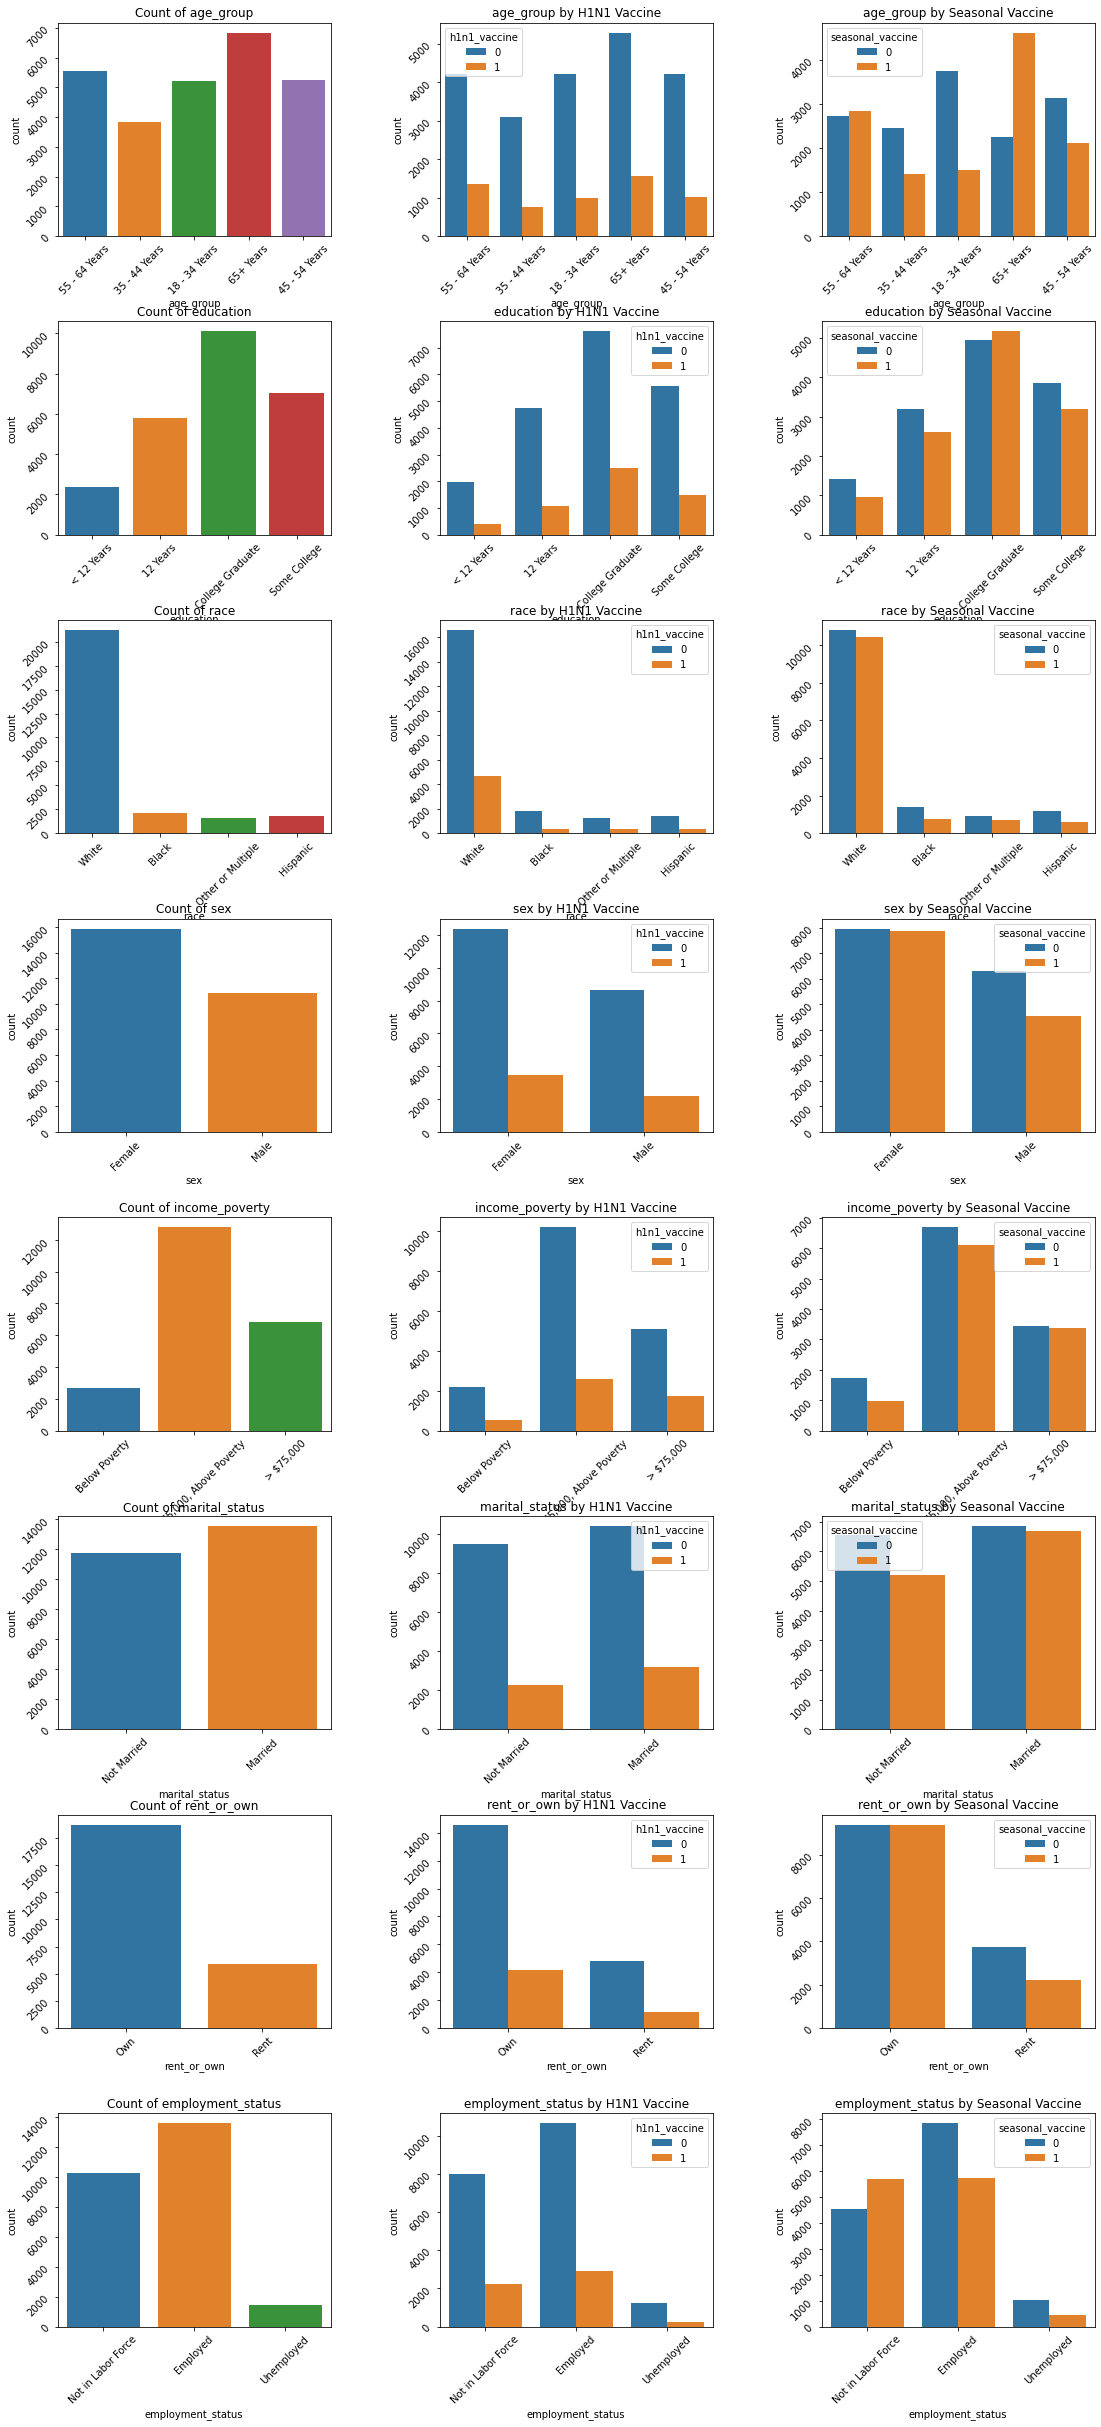

In [92]:
# Plotting multiple small charts (facets) for the categorical variables
data = features_df.join(labels_df)
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=3, figsize=(18, 5 * len(categorical_vars)))

for i, var in enumerate(categorical_vars):
    sns.countplot(data=data, x=var, ax=axes[i, 0])
    axes[i, 0].set_title(f'Count of {var}')
    axes[i, 0].tick_params(labelrotation=45)

    sns.countplot(data=data, x=var, hue='h1n1_vaccine', ax=axes[i, 1])
    axes[i, 1].set_title(f'{var} by H1N1 Vaccine')
    axes[i, 1].tick_params(labelrotation=45)

    sns.countplot(data=data, x=var, hue='seasonal_vaccine', ax=axes[i, 2])
    axes[i, 2].set_title(f'{var} by Seasonal Vaccine')
    axes[i, 2].tick_params(labelrotation=45)

# Adjust spacing
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

# Data Preprocessing

In [47]:
# Replace missing values in all three columns with -1
features_df['health_insurance'].fillna(-1, inplace=True)
features_df['employment_industry'].fillna(-1, inplace=True)
features_df['employment_occupation'].fillna(-1, inplace=True)

In [48]:
opinion_columns = [
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc'
]

# For each opinion-related column, calculate the median and fill in missing values
for column in opinion_columns:
    median_value = features_df[column].median()
    features_df[column].fillna(median_value, inplace=True)

In [21]:
# Impute 'household_children/adults' with the median and round it to the nearest integer
median_children = features_df['household_adults'].median()
features_df['household_adults'].fillna(round(median_children), inplace=True)

median_children = features_df['household_children'].median()
features_df['household_children'].fillna(round(median_children), inplace=True)

# Impute 'employment_industry' with a new category representing unknown industry
features_df['employment_industry'].fillna('unknown_industry', inplace=True)

In [22]:
# Define the columns for which to impute missing values with the mode
categorical_columns = [
    'education',
    'income_poverty',
    'marital_status',
    'rent_or_own',
    'employment_status'
]

# Perform mode imputation for each categorical column
for column in categorical_columns:
    mode_value = features_df[column].mode()[0]  # Get the mode of the column
    features_df[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode

In [23]:
# Create a missing category for 'doctor_recc_h1n1' and 'doctor_recc_seasonal'
features_df['doctor_recc_h1n1'].fillna(-1, inplace=True)
features_df['doctor_recc_seasonal'].fillna(-1, inplace=True)

In [24]:
# For ordinal variables, we'll use median imputation
ordinal_vars = ['h1n1_concern', 'h1n1_knowledge']
for var in ordinal_vars:
    median_val = features_df[var].median()
    features_df[var].fillna(median_val, inplace=True)

# For binary/categorical variables, we'll use mode imputation
binary_categorical_vars = [
    'behavioral_antiviral_meds', 'behavioral_avoidance', 
    'behavioral_face_mask', 'behavioral_wash_hands', 
    'behavioral_large_gatherings', 'behavioral_outside_home', 
    'behavioral_touch_face', 'chronic_med_condition', 
    'child_under_6_months', 'health_worker'
]
for var in binary_categorical_vars:
    mode_val = features_df[var].mode()[0]
    features_df[var].fillna(mode_val, inplace=True)

In [25]:
features_df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [26]:
from sklearn.preprocessing import LabelEncoder

features_df.reset_index(inplace=True, drop=True)

#Normalization Employement Columns
features_df['employment_industry'] = features_df['employment_industry'].astype('category').cat.codes
features_df['employment_occupation'] = features_df['employment_occupation'].astype('category').cat.codes

# Define a mapping from age group strings to integers
age_group_mapping = {
    '18 - 34 Years': 1,
    '35 - 44 Years': 2,
    '45 - 54 Years': 3,
    '55 - 64 Years': 4,
    '65+ Years': 5
}

# Apply the mapping to the 'age_group' column
features_df['age_group'] = features_df['age_group'].map(age_group_mapping)

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Columns correspond to the following features:
categorical_features = [
    'education', 'race', 'sex', 'income_poverty', 'marital_status',
    'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa'
]

# Apply label encoding to each categorical feature
for feature in categorical_features:
    features_df[feature] = label_encoder.fit_transform(features_df[feature])

# Verify the transformation
print(features_df.head())

   h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                

In [27]:
features_df = features_df.reset_index()
features_df.rename(columns={'index': 'respondent_id'}, inplace=True)
print(features_df.columns)

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')
